# Version uno

In [1]:
# Librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import math


In [2]:
# Array para guardar los resultados
dataArray = []

In [3]:
# Crear funcion del modelo
def calcularModelo(numero):
    
      
 # Creamos el Dataframe
    datos = {
    'Pago' : [0,500,1000,2000,5000,8000,10000],
    'Probabilidad': [0.83,0.06,0.05,0.02,0.02,0.01,0.01]
    }
    df = pd.DataFrame(datos)
    # Suma de probabilidad
    sumProbabilidad = np.cumsum(df["Probabilidad"])
    df['FDP'] = sumProbabilidad
    # Obtenemos los datos mínimos
    datosMin = df['FDP']+0.001
    # Obtenemos los datos máximos
    datosMax = df['FDP']
    # Asignamos al DataFrame
    df['Min'] = datosMin
    df['Max'] = datosMax
    # Se establecen correctamente los datos mínimos
    df['Min'] = df['Min'].shift(periods=1, fill_value=0)
    df
        # n = Cantidad de tenedores de pólizas
    n = 1000
    m = 2**32
    a = numero
    x0 = 4
    c = 1
    # Obtenemos los resultados
    x = [1] * n
    r = [0.1] * n
    for i in range(0, n):
        x[i] = ((a*x0)+c) % m
        x0 = x[i]
        r[i] = x0 / m
    # llenamos el DataFrame
    d = {'ri': r }
    dfMCL = pd.DataFrame(data=d)
    dfMCL
    # Valores máximos
    max = df ['Max'].values
    # Valores mínimos
    min = df ['Min'].values
    # Definimos el número de pagos
    n = 32
    # Función de búsqueda
    def busqueda(arrmin, arrmax, valor):
        
        for i in range (len(arrmin)):
            if valor >= arrmin[i] and valor <= arrmax[i]:
                return i
     #print(i)
        return -1
    xpos = dfMCL['ri']
    posi = [0] * n
    #print (n)
    for j in range(n):
        val = xpos[j]
        pos = busqueda(min,max,val)
        posi[j] = pos
     # Definiendo un índice para simular datos
    ind = [1,2,3,4,5,6,7]
    df["Indice"] = ind
    # Ordenamos el DataFrame
    df = df[['Indice', 'Pago','Probabilidad','FDP','Min','Max']]
     # Array para guardar los datos
    simula = []
    for j in range(n):
        for i in range(n):
            sim = df.loc[df["Indice"]== posi[i]+1 ]
            simu = sim.filter(['Pago']).values
            iterator = itertools.chain(*simu)
                      
            for item in iterator:
                a=item
            simula.append(round(a,2))
     # Insertamos en el DataFrame los datos de simulación
    dfMCL["Simulación"] = pd.DataFrame(simula)
    # Sumamos 39 ya que el precio de la acción actual es de 39
    dfMCL["Pagos a tenedor"] = dfMCL["Simulación"]
 # Suma de Pagos a tenedor
    data = dfMCL['Pagos a tenedor'].sum()
    dataArray.append(data)

 # Imprimir resultado
    print('Suma de los pagos al tenedor:', data)
    return dfMCL
 

In [4]:
calcularModelo(22695477)


Suma de los pagos al tenedor: 661000


,ri,Simulación,Pagos a tenedor
0,0.021137,0,0
1,0.992121,10000,10000
2,0.164339,0,0
3,0.063835,0,0
4,0.661529,0,0
...,...,...,...
995,0.550303,0,0
996,0.523982,0,0
997,0.224671,0,0
998,0.253950,0,0


In [5]:
calcularModelo(22753197)


Suma de los pagos al tenedor: 512500


,ri,Simulación,Pagos a tenedor
0,0.021191,0,0
1,0.128282,0,0
2,0.716912,0,0
3,0.394243,0,0
4,0.893756,1000,1000
...,...,...,...
995,0.187913,0,0
996,0.929752,1000,1000
997,0.568426,0,0
998,0.431499,0,0


In [6]:
# Datos de las 30 simulaciones
print(dataArray)

[661000, 512500]


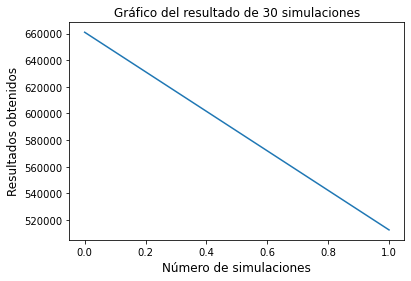

In [7]:
# Obtenemos el número de simulaciones
cantidad_x = len(dataArray)
x = np.arange(cantidad_x)
# Generamos los resultados
plt.plot(x, dataArray)
# Título del gráfico
plt.title('Gráfico del resultado de 30 simulaciones')
# Leyendas en x & y
plt.xlabel('Número de simulaciones', fontsize=12)
plt.ylabel('Resultados obtenidos', fontsize=12)
# Mostramos el gráfico
plt.show()

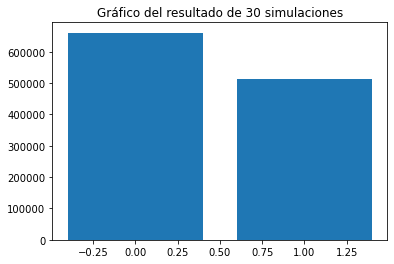

In [8]:
# Gráfico de barras
plt.bar(x, dataArray)
plt.title('Gráfico del resultado de 30 simulaciones')
plt.show()

# Version Dos

In [9]:
import pandas as pd
import numpy as np
d = {'Indices': [1,2,3,4,5,6,7],
     'Pago': [0, 500,1000,2000,5000,8000,10000], 
     'Probabilidad': [0.83,0.06,0.05,0.02,0.02,0.01,0.01],
    }
#datos.head()
datos= pd.DataFrame(data=d)
datos
ResultadoSimulaciones = []

In [10]:
suma = datos['Probabilidad'].sum()
n=len(datos)
suma
x1 = datos.assign(Probabilidad=lambda x: x['Probabilidad'] / suma)
x2 = x1.sort_values('Pago')
a=x2['Probabilidad']
a


0    0.83
1    0.06
2    0.05
3    0.02
4    0.02
5    0.01
6    0.01
Name: Probabilidad, dtype: float64

In [11]:
a1= np.cumsum(a) #Cálculo la suma acumulativa de las probabilidades
x2['FDP'] =a1
x2


,Indices,Pago,Probabilidad,FDP
0,1,0,0.83,0.83
1,2,500,0.06,0.89
2,3,1000,0.05,0.94
3,4,2000,0.02,0.96
4,5,5000,0.02,0.98
5,6,8000,0.01,0.99
6,7,10000,0.01,1.00


In [12]:
x2['Min'] = x2['FDP']
x2['Max'] = x2['FDP']
x2

,Indices,Pago,Probabilidad,FDP,Min,Max
0,1,0,0.83,0.83,0.83,0.83
1,2,500,0.06,0.89,0.89,0.89
2,3,1000,0.05,0.94,0.94,0.94
3,4,2000,0.02,0.96,0.96,0.96
4,5,5000,0.02,0.98,0.98,0.98
5,6,8000,0.01,0.99,0.99,0.99
6,7,10000,0.01,1.00,1.00,1.00


In [13]:
lis = x2["Min"].values
lis2 = x2['Max'].values
lis[0]= 0
for i in range(1,5):
    lis[i] = lis2[i-1]
    print(i,i-1)
x2['Min'] = lis
x2


1 0
2 1
3 2
4 3


,Indices,Pago,Probabilidad,FDP,Min,Max
0,1,0,0.83,0.83,0.00,0.83
1,2,500,0.06,0.89,0.83,0.89
2,3,1000,0.05,0.94,0.89,0.94
3,4,2000,0.02,0.96,0.94,0.96
4,5,5000,0.02,0.98,0.96,0.98
5,6,8000,0.01,0.99,0.99,0.99
6,7,10000,0.01,1.00,1.00,1.00


In [14]:
max = x2 ['Max'].values
min = x2 ['Min'].values
print(min)
print(max)

[0.   0.83 0.89 0.94 0.96 0.99 1.  ]
[0.83 0.89 0.94 0.96 0.98 0.99 1.  ]


In [15]:
x2 = x2.astype({"Pago" : int})
x2


,Indices,Pago,Probabilidad,FDP,Min,Max
0,1,0,0.83,0.83,0.00,0.83
1,2,500,0.06,0.89,0.83,0.89
2,3,1000,0.05,0.94,0.89,0.94
3,4,2000,0.02,0.96,0.94,0.96
4,5,5000,0.02,0.98,0.96,0.98
5,6,8000,0.01,0.99,0.99,0.99
6,7,10000,0.01,1.00,1.00,1.00


In [16]:
import random
import itertools
import math
def busqueda(arrmin, arrmax, valor):
    #print(valor)
    for i in range (len(arrmin)):
        # print(arrmin[i],arrmax[i])
        if valor >= arrmin[i] and valor <= arrmax[i]:
            return i
            print(i)
    return -1
for aqw in range(30):
    n, m, a, x0, c = 1000, 2**32, random.randint(20000,300000), 4, 1
    x = [1] * n
    r = [0.1] * n
    for i in range(0, n):
        x[i] = ((a*x0)+c) % m
        x0 = x[i]
        r[i] = x0 / m
 # llenamos nuestro DataFrame
    d = {'ri': r }
    dfMCL = pd.DataFrame(data=d)
    dfMCL

    xpos = dfMCL['ri']
    posi = [0] * n
    print (n)
    for j in range(n):
        val = xpos[j]
        pos = busqueda(min,max,val)
        posi[j] = pos
    simula = []
    for i in range(n):
        sim = x2.loc[x2["Indices"] == posi[i]+1]
        simu = sim.filter(['Pago']).values
        iterator = itertools.chain(*simu)
        for item in iterator:
            a=item
        simula.append(round(a,2))
    print(simula)
    dfMCL["Simulacion"]= pd.DataFrame(simula)
    dfMCL["Pagos_a_tenedor"]=dfMCL["Simulacion"]
    dfMCL
    valores = dfMCL["Pagos_a_tenedor"].sum()
    ResultadoSimulaciones.append(valores)

1000
[0, 0, 0, 0, 0, 0, 0, 0, 1000, 0, 0, 0, 0, 0, 2000, 0, 500, 0, 0, 1000, 0, 0, 5000, 0, 0, 0, 5000, 0, 1000, 0, 0, 0, 5000, 0, 500, 0, 2000, 0, 500, 0, 0, 0, 0, 0, 0, 500, 0, 0, 2000, 0, 0, 2000, 0, 0, 0, 5000, 500, 0, 0, 0, 0, 0, 0, 0, 1000, 0, 0, 2000, 0, 0, 1000, 0, 0, 0, 0, 0, 500, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500, 0, 0, 0, 1000, 0, 0, 0, 0, 500, 0, 0, 0, 0, 0, 1000, 0, 0, 0, 0, 0, 0, 500, 0, 5000, 5000, 0, 0, 0, 0, 0, 0, 5000, 0, 0, 0, 0, 1000, 500, 1000, 0, 0, 0, 0, 0, 0, 0, 0, 5000, 0, 0, 0, 0, 0, 5000, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 1000, 0, 0, 0, 0, 0, 0, 500, 0, 0, 0, 0, 5000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 500, 0, 0, 0, 0, 0, 0, 500, 0, 0, 0, 0, 0, 1000, 500, 0, 0, 0, 500, 0, 5000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500, 0, 0, 0, 0, 0, 0, 5000, 1000, 0, 0, 0, 500, 500, 0, 0, 0, 0, 1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500, 0, 0, 500, 0, 0, 0, 0, 1000, 0, 0, 0, 0, 0, 0, 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 1000, 0, 0, 0, 0, 1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

[0, 0, 0, 0, 0, 500, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1000, 0, 0, 0, 0, 0, 0, 1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5000, 0, 0, 0, 0, 0, 0, 0, 0, 500, 0, 0, 0, 0, 0, 0, 0, 0, 5000, 0, 0, 500, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500, 0, 500, 0, 0, 500, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1000, 0, 0, 0, 0, 0, 0, 500, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1000, 0, 500, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 500, 0, 0, 0, 0, 0, 0, 0, 0, 1000, 0, 0, 0, 0, 500, 0, 0, 500, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1000, 0, 0, 500, 1000, 0, 0, 1000, 0, 0, 1000, 0, 0, 0, 0, 0, 0, 0, 500, 0, 0, 0, 0, 0, 0, 1000, 0, 0, 1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1000, 0, 0, 0, 0, 0, 5000, 0, 0, 500, 0, 0, 0, 0, 500, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 500, 0, 0, 0, 0, 5000, 0, 0, 0, 0, 0, 2000, 1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 1000, 0, 0, 0,

[0, 0, 0, 500, 500, 0, 0, 5000, 500, 0, 0, 0, 0, 0, 0, 0, 500, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1000, 0, 0, 0, 0, 0, 5000, 0, 0, 0, 500, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500, 0, 0, 0, 0, 1000, 0, 0, 500, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500, 0, 0, 0, 0, 500, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1000, 0, 0, 0, 0, 1000, 0, 5000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1000, 2000, 0, 0, 1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1000, 0, 0, 0, 0, 0, 0, 0, 0, 500, 2000, 0, 0, 5000, 0, 0, 0, 0, 0, 1000, 1000, 0, 1000, 0, 0, 0, 0, 0, 0, 500, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500, 0, 0, 2000, 0, 0, 500, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500, 0, 0, 0, 0, 500, 0, 0, 0, 0, 0, 0, 0, 0, 1000, 0, 0, 0, 0, 0, 0, 500, 0, 1000, 500, 0, 0, 0, 0, 0, 0, 0, 0, 500, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500, 1000, 0, 0, 0, 0, 1000, 0, 2000, 0, 0, 0, 0, 500, 0, 0, 0, 1000, 0, 0, 2000, 0, 0, 0, 0, 0, 5000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500, 0, 0, 500, 0, 0, 0

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500, 0, 0, 0, 0, 0, 5000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1

[0, 5000, 500, 0, 0, 0, 0, 0, 0, 0, 1000, 0, 0, 1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 500, 0, 0, 0, 1000, 0, 0, 0, 1000, 0, 0, 0, 0, 0, 0, 1000, 1000, 0, 0, 0, 0, 0, 0, 500, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 500, 0, 0, 1000, 0, 0, 0, 500, 0, 0, 0, 5000, 0, 0, 5000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500, 0, 0, 0, 500, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500, 0, 0, 500, 5000, 0, 500, 500, 0, 0, 0, 0, 0, 1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1000, 0, 0, 500, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5000, 5000, 0, 1000, 0, 0, 0, 500, 0, 0, 0, 0, 5000, 0, 5000, 0, 0, 0, 500, 0, 0, 0, 0, 0, 0, 0, 0, 500, 0, 0, 0, 0, 0, 1000, 0, 0, 0, 0, 0, 1000, 0, 500, 5000, 5000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 1000, 0, 0, 1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 5000, 0, 0, 0, 0, 0, 0, 0, 500, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500, 500, 0, 0, 0

[0, 0, 0, 500, 2000, 0, 0, 0, 0, 5000, 0, 0, 0, 0, 0, 0, 500, 0, 0, 1000, 0, 0, 0, 0, 0, 5000, 0, 0, 0, 0, 0, 2000, 0, 500, 0, 0, 1000, 0, 0, 0, 0, 0, 0, 0, 0, 1000, 500, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500, 0, 0, 0, 0, 0, 0, 500, 500, 0, 0, 0, 0, 2000, 500, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1000, 1000, 0, 500, 500, 0, 0, 0, 0, 0, 500, 5000, 0, 0, 0, 0, 500, 0, 0, 0, 2000, 500, 0, 0, 500, 0, 0, 0, 500, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500, 0, 0, 0, 0, 1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1000, 0, 0, 0, 0, 0, 0, 0, 1000, 0, 0, 0, 0, 0, 0, 0, 5000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500, 0, 2000, 0, 0, 0, 0, 500, 0, 500, 0, 500, 5000, 0, 0, 1000, 1000, 0, 1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500, 500, 5000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500, 0, 0, 0, 0, 0, 0, 500, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500, 1000, 0, 0, 0, 0, 0, 500, 0, 0, 1000, 0,

[0, 0, 0, 0, 0, 0, 500, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 1000, 0, 0, 0, 500, 0, 0, 0, 0, 0, 0, 0, 0, 1000, 1000, 5000, 0, 0, 2000, 0, 500, 0, 500, 500, 0, 0, 0, 0, 0, 5000, 0, 1000, 500, 0, 0, 0, 0, 0, 0, 0, 1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1000, 1000, 500, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1000, 0, 0, 0, 0, 0, 1000, 0, 0, 0, 0, 0, 0, 0, 0, 1000, 0, 0, 500, 1000, 0, 500, 0, 0, 0, 500, 0, 500, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1000, 0, 0, 0, 500, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1000, 0, 0, 0, 0, 0, 2000, 0, 0, 1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500, 0, 0, 0, 0, 0, 500, 0, 0, 0, 0, 1000, 0, 0, 0, 0, 0, 0, 500, 2000, 0, 1000, 0, 0, 0, 5000, 0, 500, 0, 0, 0, 0, 0, 5000, 0, 0, 0, 0, 500, 0, 0, 0, 1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 500, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 500, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1000, 0, 0, 0, 0, 0, 0

[0, 0, 0, 0, 0, 0, 500, 0, 0, 0, 0, 5000, 0, 0, 0, 0, 0, 0, 0, 0, 1000, 0, 1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

[0, 500, 0, 0, 1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

[0, 0, 0, 0, 0, 0, 0, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 

In [19]:
print('Suma de las simulaciones')
print(ResultadoSimulaciones)


Suma de las simulaciones
[271000, 6000, 272000, 4000, 485500, 2000, 244500, 12000, 7000, 200000, 500, 249500, 974500, 207500, 216500, 6500, 1000, 227000, 205500, 4500, 204000, 183500, 488500, 7500, 3000, 244500, 1500, 233000, 210500, 993000]


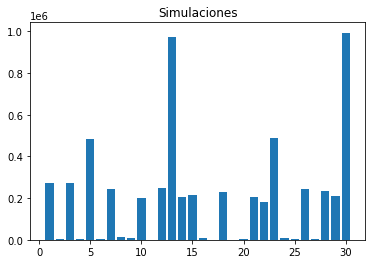

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
eje_x = [ 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,18,20,21,22,23,24,25,26,27,28,29,30]
plt.bar(eje_x,ResultadoSimulaciones)
plt.title('Simulaciones')
plt.show()

# Version Tres

In [33]:
# vector = df["aleatorio"].values
# mini = x2["Min"].values
# maxi = x2["Max"].values
# cambioprecio = x2["cambioprecio"].values
# accion = []
# for i in range(0,len(vector)):
    
#     for j in range(0, len(mini)):
#         if ( maxi[j] >= vector[i] >= mini[j]):
#             accion.append(cambioprecio[j])
# df['accion'] = accion
# df